In [1]:
import pandas as pd
import numpy as np

In [2]:
nanValues = [" 'job': 'Foley'"," 'credit_id': '58b55b3cc3a3685f020085cf'"," 'id': 1299484}"," 'job': 'Rigging Grip'"," 'id': 1648060}"," 'credit_id': '554924b392514104b80003c5'"," 'id': 1767012}"," {'name': 'Morten Folmer Nielsen'"," 'credit_id': '5681e7f89251414ecb003c42'"," {'name': 'John J. Hess'"]

In [3]:
df = pd.read_csv("moviedatabase.csv",na_values=nanValues ,low_memory=False)

In [4]:
df.dtypes

index            object
budget           object
genres           object
homepage         object
id               object
                  ...  
Unnamed: 1260    object
Unnamed: 1261    object
Unnamed: 1262    object
Unnamed: 1263    object
Unnamed: 1264    object
Length: 1265, dtype: object

In [5]:
df.vote_count.unique()

array([11800.,  4500.,  4466., ...,   587.,  1708.,  2078.])

In [6]:
df.vote_count = df.vote_count.astype(np.number)
df.vote_average = df.vote_average.astype(np.number)

In [7]:
df.shape

(4809, 1265)

In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
count = missing_value_df[missing_value_df.percent_missing > 99]
count.shape

(1241, 2)

In [9]:
df.dropna(thresh=df.shape[0]*0.6,how='all',axis=1, inplace=True)

In [10]:
df.shape

(4809, 23)

In [11]:
df.isna().sum().sort_values(ascending=False)

tagline                 845
keywords                412
cast                     44
director                 37
genres                   28
vote_count                6
vote_average              6
overview                  3
runtime                   2
crew                      1
release_date              1
title                     1
revenue                   0
production_countries      0
production_companies      0
popularity                0
spoken_languages          0
original_title            0
original_language         0
status                    0
id                        0
budget                    0
index                     0
dtype: int64

In [12]:
df.head(2)

,index,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski


In [13]:
df.drop(columns=["index","title","status","production_countries","production_companies"],inplace=True)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')


df['overview'] = df['overview'].fillna('')

In [15]:
tfv_matrix = tfv.fit_transform(df['overview'])

In [16]:
tfv_matrix

<4809x10418 sparse matrix of type '<class 'numpy.float64'>'
	with 127225 stored elements in Compressed Sparse Row format>

In [17]:
tfv_matrix.shape

(4809, 10418)

In [18]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [19]:
sig[0]

array([0.76163447, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [20]:
indices = pd.Series(df.index, index=df['original_title']).drop_duplicates()

In [21]:
indices

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4804
Newlyweds                                   4805
Signed, Sealed, Delivered                   4806
Shanghai Calling                            4807
My Date with Drew                           4808
Length: 4809, dtype: int64

In [22]:
def give_rec(title, sig=sig):
    
    idx = indices[title]

    
    sig_scores = list(enumerate(sig[idx]))

    
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    
    sig_scores = sig_scores[1:11]

   
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return df['original_title'].iloc[movie_indices]

In [23]:
give_rec('Avatar')

1347                Obitaemyy Ostrov
639                       The Matrix
3610                       Apollo 18
2136                    The American
780                        Supernova
534                 Tears of the Sun
152                          Beowulf
315     The Adventures of Pluto Nash
852                         Semi-Pro
947                 The Book of Life
Name: original_title, dtype: object

these are top 10 recommendations

In [24]:
v=df['vote_count']
R=df['vote_average']
C=df['vote_average'].mean()
m=df['vote_count'].quantile(0.70)

In [25]:
df['weighted_average']=((R*v)+ (C*m))/(v+m)

In [26]:
df.head(1)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,director,weighted_average
0,237000000,Action Adventure Fantasy Science Fiction,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,10-12-2009,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800.0,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,7.148013


In [27]:
moviesRanking = df.sort_values(by ="weighted_average",ascending=False)
moviesRanking[["original_title","vote_count","vote_average","popularity","weighted_average"]].head()

,original_title,vote_count,vote_average,popularity,weighted_average
1887,The Shawshank Redemption,8205.0,8.5,136.747729,8.340775
3343,The Godfather,5893.0,8.4,143.659698,8.192887
667,Fight Club,9413.0,8.3,146.757391,8.171648
3238,Pulp Fiction,8428.0,8.3,121.463076,8.157615
66,The Dark Knight,12002.0,8.2,187.322927,8.102674


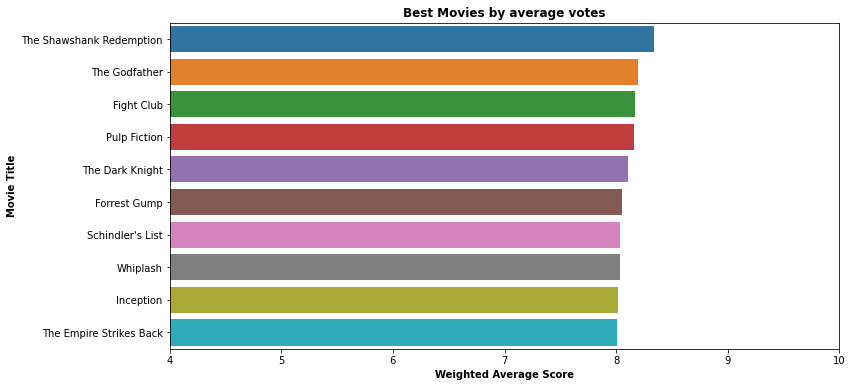

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

weight_average=moviesRanking.sort_values('weighted_average',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_average['weighted_average'].head(10), y=weight_average['original_title'].head(10), data=weight_average)
plt.xlim(4, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_movies.png')

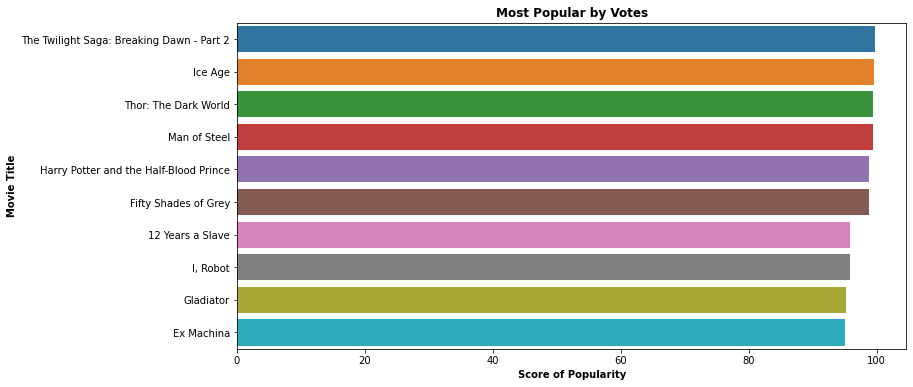

In [29]:
popularity=moviesRanking.sort_values('popularity',ascending=False)
plt.figure(figsize=(12,6))
ax=sns.barplot(x=popularity['popularity'].head(10), y=popularity['original_title'].head(10), data=popularity)

plt.title('Most Popular by Votes', weight='bold')
plt.xlabel('Score of Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_popular_movies.png')